In [1]:
import pandas as pd
from glob import glob
from random import shuffle
import os
## you must first run pip install opencv-python in the anaconda prompt
import cv2
from PIL import Image,ImageChops
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
import numpy as np
import keras
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [2]:
paths = pd.DataFrame({'path': glob(os.path.join('224x224/*.jpg'))})

In [3]:
paths['id'] = paths.path.map(lambda x: x.split("\\")[1])
paths.head()

,path,id
0,224x224\0001484524.jpg,0001484524.jpg
1,224x224\0001956604.jpg,0001956604.jpg
2,224x224\0002158434.jpg,0002158434.jpg
3,224x224\0002163306.jpg,0002163306.jpg
4,224x224\0002169681.jpg,0002169681.jpg


In [5]:
# keep only the genres with these IDs, otherwise the data is too big for our computers to handle splitting for validation 
GIDs = [2, 16, 29, 22, 17]

In [6]:
lab = pd.read_table('labels.txt', sep=',', header=None)
lab.columns = ["idNA", "id", "url", "title", "Author", "genre_id", "genre"]

In [7]:
lab = lab[lab['genre_id'].isin(GIDs)]
lab.head()

,idNA,id,url,title,Author,genre_id,genre
8568,553418025,0553418025.jpg,http://ecx.images-amazon.com/images/I/41-YkFag...,The Martian,Andy Weir,17,"Mystery, Thriller & Suspense"
8569,385539436,0385539436.jpg,http://ecx.images-amazon.com/images/I/51CpGYrq...,Rogue Lawyer,John Grisham,17,"Mystery, Thriller & Suspense"
8570,1476783454,1476783454.jpg,http://ecx.images-amazon.com/images/I/51Km1%2B...,The Survivor (A Mitch Rapp Novel),Vince Flynn,17,"Mystery, Thriller & Suspense"
8571,316349933,0316349933.jpg,http://ecx.images-amazon.com/images/I/51hy%2BG...,Career of Evil (Cormoran Strike),Robert Galbraith,17,"Mystery, Thriller & Suspense"
8572,1594633665,1594633665.jpg,http://ecx.images-amazon.com/images/I/516YNFvZ...,The Girl on the Train,Paula Hawkins,17,"Mystery, Thriller & Suspense"


In [8]:
data = paths.merge(lab, on = "id")
data.head()

,path,id,idNA,url,title,Author,genre_id,genre
0,224x224\0002163306.jpg,0002163306.jpg,2163306,http://ecx.images-amazon.com/images/I/51O8E0ZY...,Agatha Christie: A Biography,Janet Morgan,17,"Mystery, Thriller & Suspense"
1,224x224\0002550024.jpg,0002550024.jpg,2550024,http://ecx.images-amazon.com/images/I/51UlHNwB...,Tekkin a Waalk: Along the Miskito Coast,Peter Ford,29,Travel
2,224x224\0006513549.jpg,0006513549.jpg,6513549,http://ecx.images-amazon.com/images/I/5143E2YR...,The Money Makers,Harry Bingham,17,"Mystery, Thriller & Suspense"
3,224x224\0007113439.jpg,0007113439.jpg,7113439,http://ecx.images-amazon.com/images/I/41G743GC...,South Africa (Collins),NaN,29,Travel
4,224x224\0007142528.jpg,0007142528.jpg,7142528,http://ecx.images-amazon.com/images/I/51wRnYiv...,The Sewing Circles of Herat: My Afghan Years,Christina Lamb,29,Travel


In [9]:
t=data['path'].loc[0]

In [10]:
# Set the id as the index in df_data
data.set_index('id', inplace=True)

In [11]:
one_hot = pd.get_dummies(data['genre'])
df = pd.concat([data,pd.get_dummies(data['genre'], prefix='')],axis=1)
df.head()

,path,idNA,url,title,Author,genre_id,genre,_Business & Money,_Medical Books,"_Mystery, Thriller & Suspense",_Romance,_Travel
id,,,,,,,,,,,,
0002163306.jpg,224x224\0002163306.jpg,2163306,http://ecx.images-amazon.com/images/I/51O8E0ZY...,Agatha Christie: A Biography,Janet Morgan,17,"Mystery, Thriller & Suspense",0,0,1,0,0
0002550024.jpg,224x224\0002550024.jpg,2550024,http://ecx.images-amazon.com/images/I/51UlHNwB...,Tekkin a Waalk: Along the Miskito Coast,Peter Ford,29,Travel,0,0,0,0,1
0006513549.jpg,224x224\0006513549.jpg,6513549,http://ecx.images-amazon.com/images/I/5143E2YR...,The Money Makers,Harry Bingham,17,"Mystery, Thriller & Suspense",0,0,1,0,0
0007113439.jpg,224x224\0007113439.jpg,7113439,http://ecx.images-amazon.com/images/I/41G743GC...,South Africa (Collins),NaN,29,Travel,0,0,0,0,1
0007142528.jpg,224x224\0007142528.jpg,7142528,http://ecx.images-amazon.com/images/I/51wRnYiv...,The Sewing Circles of Herat: My Afghan Years,Christina Lamb,29,Travel,0,0,0,0,1


In [12]:
df['image'] = df['path'].map(cv2.imread)

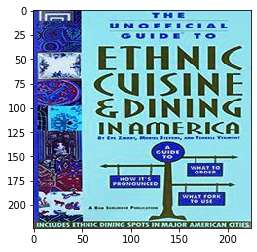

In [13]:
plt.imshow(df.image[10])

In [14]:
df.genre[10]

'Travel'

In [16]:
# do tolist because the numpy array would otherwise have the wrong shape for machine learning
X = np.array(df.image.tolist())
X.shape 

# remove everything from the dataframe except for the dummies 
y = np.array(df.drop(["idNA","path", "url", "title", "Author", "genre_id", "genre", "image"], axis=1))
y.shape

(9500, 5)

In [17]:
# train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.1)

In [77]:
## Add the new images that we took on our own which will be test images

newpaths = pd.DataFrame({'newpath': glob(os.path.join('project/*.jpg'))})

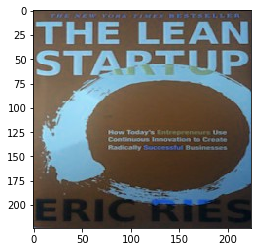

In [78]:
newpaths['image'] = newpaths['newpath'].map(cv2.imread)
plt.imshow(newpaths.image[2])

In [79]:
NewX = np.array(newpaths.image.tolist())
NewX.shape 

(25, 224, 224, 3)

In [72]:
##### THIS IS NOT OUR FINAL MODEL --- IT IS A TRIAL MODEL AND DOES NOT WORK

model = Sequential()
# the shape of each image
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# 5 because we have 5 categories to sift through
model.add(Dense(5, activation='sigmoid'))

# we use sigmoid because we have one hot encoded our categories, so our data is binary

In [73]:
### TRIAL MODEL 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
### TRIAL MODEL 

hist = model.fit(X_train, y_train, batch_size=50, epochs=4, verbose= 1, validation_data=(X_val, y_val))

Train on 8550 samples, validate on 950 samples
Epoch 1/4
8550/8550 [==============================] - ETA: 14:41 - loss: 7.9180 - acc: 0.49 - ETA: 10:57 - loss: 7.5736 - acc: 0.52 - ETA: 9:44 - loss: 7.1935 - acc: 0.5440 - ETA: 9:05 - loss: 7.2219 - acc: 0.542 - ETA: 8:39 - loss: 7.1155 - acc: 0.549 - ETA: 8:20 - loss: 6.9895 - acc: 0.558 - ETA: 8:06 - loss: 6.9331 - acc: 0.562 - ETA: 8:02 - loss: 6.8824 - acc: 0.566 - ETA: 7:54 - loss: 6.7942 - acc: 0.571 - ETA: 7:50 - loss: 6.7165 - acc: 0.576 - ETA: 7:47 - loss: 6.6299 - acc: 0.582 - ETA: 7:46 - loss: 6.5362 - acc: 0.588 - ETA: 7:44 - loss: 6.4988 - acc: 0.590 - ETA: 7:40 - loss: 6.4376 - acc: 0.594 - ETA: 7:36 - loss: 6.4564 - acc: 0.593 - ETA: 7:31 - loss: 6.4092 - acc: 0.596 - ETA: 7:27 - loss: 6.3712 - acc: 0.599 - ETA: 7:21 - loss: 6.3550 - acc: 0.600 - ETA: 7:16 - loss: 6.3676 - acc: 0.599 - ETA: 7:13 - loss: 6.3278 - acc: 0.602 - ETA: 7:11 - loss: 6.3223 - acc: 0.602 - ETA: 7:07 - loss: 6.3055 - acc: 0.604 - ETA: 7:03 - loss:

8550/8550 [==============================] - ETA: 8:23 - loss: 6.3371 - acc: 0.604 - ETA: 8:03 - loss: 6.7208 - acc: 0.580 - ETA: 7:58 - loss: 6.4025 - acc: 0.600 - ETA: 7:57 - loss: 6.2579 - acc: 0.609 - ETA: 7:49 - loss: 6.1203 - acc: 0.617 - ETA: 7:43 - loss: 6.1139 - acc: 0.618 - ETA: 7:38 - loss: 6.0725 - acc: 0.620 - ETA: 7:33 - loss: 6.0101 - acc: 0.624 - ETA: 7:26 - loss: 5.9754 - acc: 0.626 - ETA: 7:22 - loss: 5.9542 - acc: 0.628 - ETA: 7:18 - loss: 5.9311 - acc: 0.629 - ETA: 7:16 - loss: 5.9010 - acc: 0.631 - ETA: 7:13 - loss: 5.9442 - acc: 0.628 - ETA: 7:10 - loss: 5.9175 - acc: 0.630 - ETA: 7:08 - loss: 5.9370 - acc: 0.629 - ETA: 7:05 - loss: 5.9300 - acc: 0.629 - ETA: 7:01 - loss: 5.8975 - acc: 0.631 - ETA: 6:57 - loss: 5.8937 - acc: 0.631 - ETA: 6:53 - loss: 5.8533 - acc: 0.634 - ETA: 6:50 - loss: 5.8584 - acc: 0.634 - ETA: 6:46 - loss: 5.8386 - acc: 0.635 - ETA: 6:43 - loss: 5.8381 - acc: 0.635 - ETA: 6:39 - loss: 5.8626 - acc: 0.633 - ETA: 6:36 - loss: 5.8904 - acc: 0.6

8550/8550 [==============================] - ETA: 7:21 - loss: 5.8297 - acc: 0.636 - ETA: 7:25 - loss: 5.9552 - acc: 0.628 - ETA: 7:35 - loss: 5.9129 - acc: 0.630 - ETA: 7:36 - loss: 5.9560 - acc: 0.628 - ETA: 7:27 - loss: 6.0966 - acc: 0.619 - ETA: 7:24 - loss: 6.1259 - acc: 0.617 - ETA: 7:19 - loss: 6.0925 - acc: 0.619 - ETA: 7:14 - loss: 5.9395 - acc: 0.629 - ETA: 7:11 - loss: 5.9768 - acc: 0.626 - ETA: 7:07 - loss: 5.9871 - acc: 0.626 - ETA: 7:03 - loss: 6.0013 - acc: 0.625 - ETA: 7:00 - loss: 5.9866 - acc: 0.626 - ETA: 6:59 - loss: 5.9694 - acc: 0.627 - ETA: 6:57 - loss: 5.9409 - acc: 0.628 - ETA: 6:55 - loss: 5.9885 - acc: 0.625 - ETA: 6:55 - loss: 6.0103 - acc: 0.624 - ETA: 6:54 - loss: 5.9694 - acc: 0.627 - ETA: 6:51 - loss: 5.9508 - acc: 0.628 - ETA: 6:47 - loss: 5.9913 - acc: 0.625 - ETA: 6:44 - loss: 6.0087 - acc: 0.624 - ETA: 6:42 - loss: 6.0213 - acc: 0.623 - ETA: 6:39 - loss: 6.0618 - acc: 0.621 - ETA: 6:37 - loss: 6.0795 - acc: 0.620 - ETA: 6:34 - loss: 6.0450 - acc: 0.6

8550/8550 [==============================] - ETA: 8:23 - loss: 6.4695 - acc: 0.596 - ETA: 8:15 - loss: 6.5011 - acc: 0.594 - ETA: 8:13 - loss: 6.3614 - acc: 0.602 - ETA: 8:15 - loss: 6.1160 - acc: 0.618 - ETA: 8:10 - loss: 6.1864 - acc: 0.613 - ETA: 8:05 - loss: 6.1586 - acc: 0.615 - ETA: 7:58 - loss: 6.1300 - acc: 0.617 - ETA: 7:55 - loss: 6.0124 - acc: 0.624 - ETA: 7:52 - loss: 6.0203 - acc: 0.624 - ETA: 7:48 - loss: 6.0908 - acc: 0.619 - ETA: 7:45 - loss: 6.1134 - acc: 0.618 - ETA: 7:43 - loss: 6.1695 - acc: 0.614 - ETA: 7:40 - loss: 6.1379 - acc: 0.616 - ETA: 7:38 - loss: 6.1750 - acc: 0.614 - ETA: 7:36 - loss: 6.1088 - acc: 0.618 - ETA: 7:32 - loss: 6.0872 - acc: 0.619 - ETA: 7:29 - loss: 6.1169 - acc: 0.617 - ETA: 7:26 - loss: 6.0795 - acc: 0.620 - ETA: 7:25 - loss: 6.1066 - acc: 0.618 - ETA: 7:21 - loss: 6.0860 - acc: 0.619 - ETA: 7:19 - loss: 6.0920 - acc: 0.619 - ETA: 7:16 - loss: 6.0423 - acc: 0.622 - ETA: 7:12 - loss: 6.0107 - acc: 0.624 - ETA: 7:08 - loss: 6.0429 - acc: 0.6

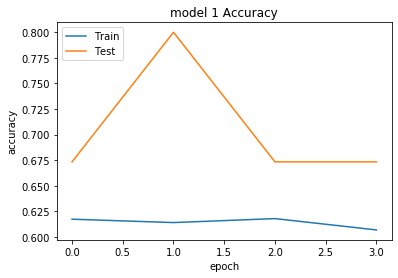

In [75]:
### TRIAL MODEL

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model 1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

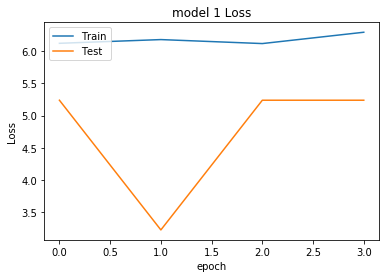

In [76]:
### TRIAL MODEL 

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [37]:
### BELOW IS THE MODEL WE USED AS THE MAIN MODEL


modelS = Sequential()
modelS.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224, 224, 3)))
modelS.add(MaxPooling2D(pool_size=(2,2)))
modelS.add(BatchNormalization())
modelS.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
modelS.add(MaxPooling2D(pool_size=(2,2)))
modelS.add(BatchNormalization())
modelS.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
modelS.add(MaxPooling2D(pool_size=(2,2)))
modelS.add(BatchNormalization())
modelS.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
modelS.add(MaxPooling2D(pool_size=(2,2)))
modelS.add(BatchNormalization())
modelS.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
modelS.add(MaxPooling2D(pool_size=(2,2)))
modelS.add(BatchNormalization())
modelS.add(Dropout(0.2))
modelS.add(Flatten())
modelS.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
modelS.add(Dense(5, activation = 'softmax'))

In [38]:
modelS.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
histS = modelS.fit(X_train, y_train, batch_size=50, epochs=10, verbose= 1, validation_data=(X_val, y_val))

Train on 8550 samples, validate on 950 samples
Epoch 1/10
8550/8550 [==============================] - ETA: 10:45 - loss: 2.1731 - acc: 0.30 - ETA: 7:36 - loss: 2.3029 - acc: 0.2000 - ETA: 6:34 - loss: 2.2379 - acc: 0.213 - ETA: 6:01 - loss: 2.1582 - acc: 0.210 - ETA: 5:40 - loss: 2.0905 - acc: 0.240 - ETA: 5:25 - loss: 2.0221 - acc: 0.246 - ETA: 5:14 - loss: 1.9967 - acc: 0.251 - ETA: 5:06 - loss: 1.9526 - acc: 0.265 - ETA: 5:00 - loss: 1.9284 - acc: 0.271 - ETA: 4:58 - loss: 1.9106 - acc: 0.278 - ETA: 4:54 - loss: 1.9088 - acc: 0.283 - ETA: 4:49 - loss: 1.8907 - acc: 0.288 - ETA: 4:45 - loss: 1.8849 - acc: 0.289 - ETA: 4:42 - loss: 1.8563 - acc: 0.300 - ETA: 4:39 - loss: 1.8493 - acc: 0.300 - ETA: 4:36 - loss: 1.8406 - acc: 0.302 - ETA: 4:35 - loss: 1.8282 - acc: 0.304 - ETA: 4:33 - loss: 1.8345 - acc: 0.300 - ETA: 4:31 - loss: 1.8284 - acc: 0.304 - ETA: 4:31 - loss: 1.8273 - acc: 0.304 - ETA: 4:29 - loss: 1.8266 - acc: 0.307 - ETA: 4:28 - loss: 1.8178 - acc: 0.311 - ETA: 4:26 - loss

8550/8550 [==============================] - ETA: 5:06 - loss: 1.1444 - acc: 0.540 - ETA: 4:56 - loss: 1.2946 - acc: 0.470 - ETA: 4:48 - loss: 1.3484 - acc: 0.446 - ETA: 4:43 - loss: 1.3222 - acc: 0.480 - ETA: 4:42 - loss: 1.3300 - acc: 0.480 - ETA: 4:39 - loss: 1.3277 - acc: 0.473 - ETA: 4:37 - loss: 1.3656 - acc: 0.460 - ETA: 4:34 - loss: 1.3934 - acc: 0.450 - ETA: 4:34 - loss: 1.4001 - acc: 0.446 - ETA: 4:33 - loss: 1.3718 - acc: 0.462 - ETA: 4:33 - loss: 1.3607 - acc: 0.467 - ETA: 4:32 - loss: 1.3469 - acc: 0.471 - ETA: 4:30 - loss: 1.3365 - acc: 0.469 - ETA: 4:28 - loss: 1.3339 - acc: 0.474 - ETA: 4:26 - loss: 1.3411 - acc: 0.462 - ETA: 4:24 - loss: 1.3493 - acc: 0.461 - ETA: 4:21 - loss: 1.3458 - acc: 0.462 - ETA: 4:19 - loss: 1.3578 - acc: 0.456 - ETA: 4:17 - loss: 1.3451 - acc: 0.462 - ETA: 4:15 - loss: 1.3513 - acc: 0.460 - ETA: 4:13 - loss: 1.3427 - acc: 0.462 - ETA: 4:11 - loss: 1.3431 - acc: 0.463 - ETA: 4:09 - loss: 1.3359 - acc: 0.463 - ETA: 4:07 - loss: 1.3375 - acc: 0.4

8550/8550 [==============================] - ETA: 4:52 - loss: 1.1456 - acc: 0.560 - ETA: 4:52 - loss: 1.1758 - acc: 0.520 - ETA: 4:48 - loss: 1.2134 - acc: 0.500 - ETA: 4:46 - loss: 1.1942 - acc: 0.515 - ETA: 4:45 - loss: 1.1754 - acc: 0.524 - ETA: 4:51 - loss: 1.1771 - acc: 0.526 - ETA: 4:53 - loss: 1.1686 - acc: 0.540 - ETA: 4:51 - loss: 1.1721 - acc: 0.532 - ETA: 4:48 - loss: 1.1943 - acc: 0.522 - ETA: 4:44 - loss: 1.1682 - acc: 0.532 - ETA: 4:42 - loss: 1.1574 - acc: 0.536 - ETA: 4:39 - loss: 1.1526 - acc: 0.536 - ETA: 4:37 - loss: 1.1454 - acc: 0.540 - ETA: 4:34 - loss: 1.1425 - acc: 0.540 - ETA: 4:32 - loss: 1.1418 - acc: 0.540 - ETA: 4:30 - loss: 1.1446 - acc: 0.543 - ETA: 4:28 - loss: 1.1439 - acc: 0.551 - ETA: 4:26 - loss: 1.1540 - acc: 0.547 - ETA: 4:23 - loss: 1.1522 - acc: 0.550 - ETA: 4:21 - loss: 1.1609 - acc: 0.544 - ETA: 4:19 - loss: 1.1691 - acc: 0.536 - ETA: 4:18 - loss: 1.1721 - acc: 0.534 - ETA: 4:17 - loss: 1.1771 - acc: 0.532 - ETA: 4:16 - loss: 1.1843 - acc: 0.5

8550/8550 [==============================] - ETA: 4:43 - loss: 1.1739 - acc: 0.500 - ETA: 4:42 - loss: 1.0553 - acc: 0.540 - ETA: 4:42 - loss: 1.0620 - acc: 0.540 - ETA: 4:39 - loss: 1.0940 - acc: 0.530 - ETA: 4:40 - loss: 1.0998 - acc: 0.528 - ETA: 4:41 - loss: 1.0975 - acc: 0.543 - ETA: 4:40 - loss: 1.1089 - acc: 0.542 - ETA: 4:39 - loss: 1.1085 - acc: 0.540 - ETA: 4:38 - loss: 1.0816 - acc: 0.553 - ETA: 4:36 - loss: 1.0830 - acc: 0.556 - ETA: 4:34 - loss: 1.1061 - acc: 0.549 - ETA: 4:32 - loss: 1.1196 - acc: 0.540 - ETA: 4:30 - loss: 1.1295 - acc: 0.533 - ETA: 4:28 - loss: 1.1279 - acc: 0.537 - ETA: 4:26 - loss: 1.1344 - acc: 0.534 - ETA: 4:30 - loss: 1.1336 - acc: 0.535 - ETA: 4:30 - loss: 1.1276 - acc: 0.536 - ETA: 4:31 - loss: 1.1184 - acc: 0.543 - ETA: 4:29 - loss: 1.1181 - acc: 0.541 - ETA: 4:27 - loss: 1.1148 - acc: 0.545 - ETA: 4:28 - loss: 1.1126 - acc: 0.549 - ETA: 4:30 - loss: 1.1116 - acc: 0.553 - ETA: 4:29 - loss: 1.1117 - acc: 0.551 - ETA: 4:27 - loss: 1.1073 - acc: 0.5

8550/8550 [==============================] - ETA: 5:20 - loss: 0.8073 - acc: 0.640 - ETA: 5:23 - loss: 0.8880 - acc: 0.620 - ETA: 5:13 - loss: 0.8947 - acc: 0.633 - ETA: 5:10 - loss: 0.9014 - acc: 0.625 - ETA: 5:05 - loss: 0.9158 - acc: 0.620 - ETA: 5:01 - loss: 0.9218 - acc: 0.626 - ETA: 4:58 - loss: 0.9396 - acc: 0.617 - ETA: 4:56 - loss: 0.9572 - acc: 0.607 - ETA: 4:57 - loss: 0.9594 - acc: 0.604 - ETA: 4:54 - loss: 0.9737 - acc: 0.594 - ETA: 4:52 - loss: 0.9801 - acc: 0.585 - ETA: 4:50 - loss: 0.9781 - acc: 0.596 - ETA: 4:48 - loss: 0.9831 - acc: 0.593 - ETA: 4:46 - loss: 0.9894 - acc: 0.592 - ETA: 4:44 - loss: 0.9900 - acc: 0.588 - ETA: 4:42 - loss: 0.9953 - acc: 0.590 - ETA: 4:40 - loss: 0.9913 - acc: 0.591 - ETA: 4:38 - loss: 0.9932 - acc: 0.593 - ETA: 4:36 - loss: 0.9778 - acc: 0.602 - ETA: 4:34 - loss: 0.9726 - acc: 0.604 - ETA: 4:34 - loss: 0.9635 - acc: 0.608 - ETA: 4:33 - loss: 0.9652 - acc: 0.607 - ETA: 4:32 - loss: 0.9598 - acc: 0.611 - ETA: 4:31 - loss: 0.9674 - acc: 0.6

8550/8550 [==============================] - ETA: 5:18 - loss: 0.9327 - acc: 0.660 - ETA: 5:18 - loss: 0.9396 - acc: 0.600 - ETA: 5:13 - loss: 0.9800 - acc: 0.560 - ETA: 5:08 - loss: 0.9417 - acc: 0.595 - ETA: 5:04 - loss: 0.9680 - acc: 0.596 - ETA: 4:59 - loss: 0.9549 - acc: 0.613 - ETA: 4:56 - loss: 0.9492 - acc: 0.625 - ETA: 4:53 - loss: 0.9422 - acc: 0.625 - ETA: 4:52 - loss: 0.9700 - acc: 0.620 - ETA: 4:50 - loss: 0.9578 - acc: 0.622 - ETA: 4:48 - loss: 0.9568 - acc: 0.618 - ETA: 4:45 - loss: 0.9473 - acc: 0.621 - ETA: 4:44 - loss: 0.9405 - acc: 0.624 - ETA: 4:46 - loss: 0.9451 - acc: 0.622 - ETA: 4:47 - loss: 0.9389 - acc: 0.629 - ETA: 4:47 - loss: 0.9277 - acc: 0.632 - ETA: 4:47 - loss: 0.9325 - acc: 0.634 - ETA: 4:46 - loss: 0.9403 - acc: 0.633 - ETA: 4:45 - loss: 0.9371 - acc: 0.634 - ETA: 4:46 - loss: 0.9346 - acc: 0.637 - ETA: 4:44 - loss: 0.9380 - acc: 0.634 - ETA: 4:41 - loss: 0.9431 - acc: 0.634 - ETA: 4:40 - loss: 0.9413 - acc: 0.633 - ETA: 4:39 - loss: 0.9442 - acc: 0.6

8550/8550 [==============================] - ETA: 4:51 - loss: 0.8552 - acc: 0.640 - ETA: 4:50 - loss: 0.8219 - acc: 0.700 - ETA: 4:51 - loss: 0.8661 - acc: 0.673 - ETA: 4:49 - loss: 0.8850 - acc: 0.655 - ETA: 4:49 - loss: 0.8802 - acc: 0.652 - ETA: 4:50 - loss: 0.9242 - acc: 0.650 - ETA: 4:55 - loss: 0.9090 - acc: 0.651 - ETA: 4:52 - loss: 0.8934 - acc: 0.660 - ETA: 4:52 - loss: 0.8866 - acc: 0.666 - ETA: 4:48 - loss: 0.8710 - acc: 0.676 - ETA: 4:48 - loss: 0.8745 - acc: 0.672 - ETA: 4:48 - loss: 0.8756 - acc: 0.671 - ETA: 4:48 - loss: 0.8746 - acc: 0.667 - ETA: 4:45 - loss: 0.8741 - acc: 0.674 - ETA: 4:44 - loss: 0.8743 - acc: 0.672 - ETA: 4:43 - loss: 0.8662 - acc: 0.675 - ETA: 4:40 - loss: 0.8572 - acc: 0.680 - ETA: 4:39 - loss: 0.8514 - acc: 0.677 - ETA: 4:37 - loss: 0.8555 - acc: 0.674 - ETA: 4:34 - loss: 0.8632 - acc: 0.672 - ETA: 4:32 - loss: 0.8572 - acc: 0.674 - ETA: 4:31 - loss: 0.8641 - acc: 0.670 - ETA: 4:28 - loss: 0.8576 - acc: 0.671 - ETA: 4:28 - loss: 0.8534 - acc: 0.6

8550/8550 [==============================] - ETA: 4:45 - loss: 0.9643 - acc: 0.640 - ETA: 4:46 - loss: 0.8451 - acc: 0.710 - ETA: 4:42 - loss: 0.7660 - acc: 0.753 - ETA: 4:40 - loss: 0.7329 - acc: 0.755 - ETA: 4:38 - loss: 0.7311 - acc: 0.748 - ETA: 4:37 - loss: 0.7606 - acc: 0.730 - ETA: 4:35 - loss: 0.7597 - acc: 0.740 - ETA: 4:33 - loss: 0.7545 - acc: 0.735 - ETA: 4:32 - loss: 0.7531 - acc: 0.735 - ETA: 4:31 - loss: 0.7451 - acc: 0.738 - ETA: 4:29 - loss: 0.7531 - acc: 0.732 - ETA: 4:27 - loss: 0.7585 - acc: 0.733 - ETA: 4:25 - loss: 0.7486 - acc: 0.732 - ETA: 4:24 - loss: 0.7428 - acc: 0.731 - ETA: 4:23 - loss: 0.7311 - acc: 0.732 - ETA: 4:22 - loss: 0.7357 - acc: 0.730 - ETA: 4:22 - loss: 0.7385 - acc: 0.728 - ETA: 4:23 - loss: 0.7519 - acc: 0.723 - ETA: 4:22 - loss: 0.7518 - acc: 0.723 - ETA: 4:22 - loss: 0.7572 - acc: 0.721 - ETA: 4:22 - loss: 0.7538 - acc: 0.721 - ETA: 4:22 - loss: 0.7577 - acc: 0.720 - ETA: 4:22 - loss: 0.7562 - acc: 0.720 - ETA: 4:22 - loss: 0.7578 - acc: 0.7

8550/8550 [==============================] - ETA: 5:27 - loss: 0.4833 - acc: 0.820 - ETA: 5:27 - loss: 0.5222 - acc: 0.840 - ETA: 5:22 - loss: 0.5932 - acc: 0.806 - ETA: 5:11 - loss: 0.6621 - acc: 0.765 - ETA: 5:03 - loss: 0.6469 - acc: 0.772 - ETA: 4:56 - loss: 0.6685 - acc: 0.760 - ETA: 4:53 - loss: 0.6412 - acc: 0.771 - ETA: 4:49 - loss: 0.6694 - acc: 0.757 - ETA: 4:44 - loss: 0.6718 - acc: 0.755 - ETA: 4:41 - loss: 0.6743 - acc: 0.752 - ETA: 4:39 - loss: 0.6741 - acc: 0.754 - ETA: 4:36 - loss: 0.6539 - acc: 0.765 - ETA: 4:34 - loss: 0.6516 - acc: 0.766 - ETA: 4:31 - loss: 0.6513 - acc: 0.761 - ETA: 4:29 - loss: 0.6627 - acc: 0.758 - ETA: 4:27 - loss: 0.6737 - acc: 0.751 - ETA: 4:24 - loss: 0.6720 - acc: 0.754 - ETA: 4:22 - loss: 0.6654 - acc: 0.762 - ETA: 4:20 - loss: 0.6655 - acc: 0.757 - ETA: 4:18 - loss: 0.6622 - acc: 0.757 - ETA: 4:16 - loss: 0.6582 - acc: 0.757 - ETA: 4:14 - loss: 0.6621 - acc: 0.756 - ETA: 4:12 - loss: 0.6809 - acc: 0.745 - ETA: 4:10 - loss: 0.6942 - acc: 0.7

8550/8550 [==============================] - ETA: 4:47 - loss: 0.6824 - acc: 0.760 - ETA: 4:58 - loss: 0.6491 - acc: 0.750 - ETA: 4:55 - loss: 0.6463 - acc: 0.746 - ETA: 4:51 - loss: 0.6321 - acc: 0.745 - ETA: 4:55 - loss: 0.6049 - acc: 0.748 - ETA: 4:58 - loss: 0.6276 - acc: 0.740 - ETA: 5:00 - loss: 0.6174 - acc: 0.757 - ETA: 4:59 - loss: 0.6091 - acc: 0.757 - ETA: 4:55 - loss: 0.6119 - acc: 0.762 - ETA: 4:53 - loss: 0.6342 - acc: 0.750 - ETA: 4:51 - loss: 0.6176 - acc: 0.756 - ETA: 4:51 - loss: 0.6163 - acc: 0.756 - ETA: 4:52 - loss: 0.6207 - acc: 0.756 - ETA: 4:49 - loss: 0.6182 - acc: 0.762 - ETA: 4:46 - loss: 0.6179 - acc: 0.761 - ETA: 4:42 - loss: 0.6155 - acc: 0.761 - ETA: 4:39 - loss: 0.6053 - acc: 0.764 - ETA: 4:36 - loss: 0.6050 - acc: 0.768 - ETA: 4:33 - loss: 0.6019 - acc: 0.770 - ETA: 4:30 - loss: 0.6071 - acc: 0.768 - ETA: 4:29 - loss: 0.6188 - acc: 0.761 - ETA: 4:29 - loss: 0.6216 - acc: 0.761 - ETA: 4:28 - loss: 0.6172 - acc: 0.760 - ETA: 4:28 - loss: 0.6180 - acc: 0.7

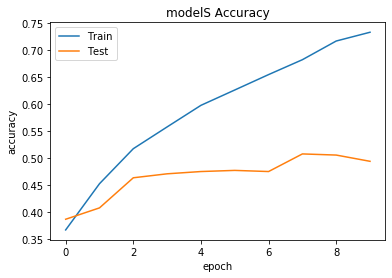

In [40]:
plt.plot(histS.history['acc'])
plt.plot(histS.history['val_acc'])
plt.title('modelS Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

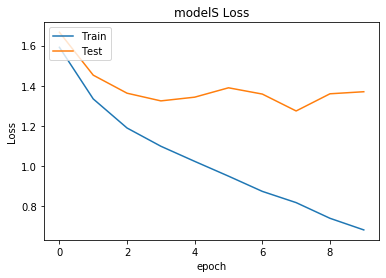

In [41]:
plt.plot(histS.history['loss'])
plt.plot(histS.history['val_loss'])
plt.title('modelS Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [43]:
loss, acc = modelS.evaluate(X_val, y_val, verbose = 0)
print(acc * 100)

49.36842108400244


In [82]:
ps = modelS.predict(NewX)

ps

array([[7.07941055e-01, 1.51269525e-01, 1.26867607e-01, 1.16930427e-02,
        2.22878694e-03],
       [4.56156462e-01, 6.59717843e-02, 1.51687831e-01, 2.69599378e-01,
        5.65845296e-02],
       [1.70963794e-01, 4.83707264e-02, 2.59321153e-01, 1.56107679e-01,
        3.65236670e-01],
       [3.05305779e-01, 2.19160784e-02, 1.78810507e-01, 4.58985381e-02,
        4.48069096e-01],
       [9.64098692e-01, 1.35462647e-02, 2.05435753e-02, 2.42734735e-04,
        1.56882836e-03],
       [1.05271801e-01, 2.68054735e-02, 3.28732096e-02, 2.69987751e-02,
        8.08050692e-01],
       [3.37371796e-01, 1.09556563e-01, 4.44856957e-02, 4.27498668e-02,
        4.65836108e-01],
       [3.05246725e-03, 2.55124789e-04, 9.76962805e-01, 1.89095791e-02,
        8.19979236e-04],
       [2.43397243e-02, 9.30368714e-03, 4.96818602e-01, 3.30569416e-01,
        1.38968542e-01],
       [8.20522457e-02, 4.43347730e-02, 1.60512090e-01, 9.00607556e-02,
        6.23040080e-01],
       [1.16920047e-01, 4.6146

In [83]:
#returns the most likely category number by order of the one hot encoded file 
pred_genres = np.argmax(ps, axis=1)+1

In [84]:
book_actual_genres = np.array([1,1,1,1,1,3,3,3,3,3,2,2,2,2,2,4,4,4,4,4,5,5,5,5,5])

In [65]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(book_actual_genres, pred_genres, labels=None, sample_weight=None)

array([[3, 0, 0, 0, 2],
       [2, 3, 0, 0, 0],
       [0, 0, 2, 0, 3],
       [0, 1, 0, 3, 1],
       [0, 0, 0, 0, 5]], dtype=int64)

In [87]:
pred_genres

array([1, 1, 5, 5, 1, 5, 5, 3, 3, 5, 2, 2, 2, 1, 1, 5, 4, 4, 2, 4, 5, 5,
       5, 5, 5], dtype=int64)